<a href="https://colab.research.google.com/github/Pegoral123/-Tebela_manipulation/blob/main/alura_aplicando_pandas_NOTBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo a base de dados

## Importando os dados


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"
dados = pd.read_csv(url, sep=";") # metodo read_csv ler o data set e por padrão ja tira virgular porem nesse data ser estava com ponto e virgula e por isso usando o sep para que possa fazer essa organização

#read_csv(): Essa função é usada para ler arquivos CSV (Comma Separated Values), que são arquivos de texto que contêm dados separados por vírgulas.
#É possível passar diversos parâmetros para personalizar a leitura do csv, como delimitador, cabeçalho, tipo de encoding, entre outros.

#read_excel(): Essa função é usada para ler arquivos do Excel (.xls ou .xlsx) e criar um DataFrame a partir dos dados.

#read_json(): Essa função é usada para ler arquivos JSON (JavaScript Object Notation), que são arquivos de texto que contêm dados em formato de objeto JavaScript.

#read_html(): Essa função é usada para ler tabelas HTML, que são estruturas de dados organizadas em formato de tabela em uma página da web.

#read_sql(): Essa função é usada para ler dados de um banco de dados relacional, como o MySQL, PostgreSQL e SQL Server. O Pandas é capaz de importar dados de diferentes formas,
#permitindo ajustar parâmetros como a consulta, o nome da tabela e o tipo de dados das colunas.

dados.head(10)# metodo head escolher quantas linhas vai poder manipular
dados.tail(10)# metodo tail escolher quantas linhas vai poder manipular porem pega as ultimas linhas
dado= dados.head(10)
dado.describe() #O método describe() é uma função amplamente utilizada em bibliotecas de manipulação de dados, como o Pandas, para gerar estatísticas descritivas de um DataFrame ou de uma Series.
#Ele fornece informações resumidas, como a média, o desvio padrão, os valores mínimos e máximos, e os percentis.

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,5.000000
mean,1.700000,1.400000,0.600000,198.300000,7600.000000,4105.666667,847.600000
std,1.494434,1.712698,1.577621,278.996237,11622.487781,7535.758188,1306.462897
min,0.000000,0.000000,0.000000,15.000000,800.000000,230.000000,17.000000
25%,1.000000,0.000000,0.000000,48.500000,1050.000000,323.250000,20.000000
50%,1.500000,0.500000,0.000000,67.500000,1500.000000,445.000000,60.000000
75%,2.000000,2.750000,0.000000,137.500000,6550.000000,3140.000000,1111.000000
max,5.000000,4.000000,5.000000,750.000000,35000.000000,19193.000000,3030.000000


In [2]:
url2 = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv"
dado = pd.read_csv(url2, sep=",")
verificar_as_primeiras_tres_linhas = dado.head(8)
verificar_as_colunas = dado.shape
dado.columns #verificar as colunas do dataframa
dado['Nome']#seleciona uma coluna
dado[['Idade', 'Notas']]#seleciona multiplas coluna
dado.dtypes #verificar o tipo de valor em cada coluna

,0
Nome,object
Idade,int64
Notas,float64
Aprovado,bool


## Características gerais da base de dados

In [3]:
dados.shape # verifica tamanho da linha e coluna do data frame

(32960, 9)

In [4]:
dados.columns # verifica o nome das colunas

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [5]:
dados.info() # mostra informações do data frame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [6]:
dados['Tipo'] #verificar especificamente a coluna

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento
...,...
32955,Quitinete
32956,Apartamento
32957,Apartamento
32958,Apartamento


In [7]:
dados[['Quartos', 'Valor']] #verificar especificamente duas colunas de uma vez

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

In [8]:
#O método groupby do Pandas permite agrupar e resumir dados de um DataFrame, com base em um ou mais critérios. Esses critérios podem ser variáveis numéricas ou categóricas, como colunas ou índices do DataFram
#by: esse é o parâmetro mais comum e é usado para especificar a coluna ou colunas que queremos agrupar. Como argumento dele, podemos passar o nome de uma coluna ou uma lista de nomes de colunas;
#axis: utilizamos esse parâmetro para especificar o eixo ao longo do qual queremos agrupar. O valor padrão dele é 0, o que significa que as linhas serão agrupadas. Se quisermos agrupar as colunas, devemos definir esse parâmetro co
#sort: esse parâmetro é um booleano (True ou False) que indica se os grupos devem ser ordenados pelo valor da coluna de agrupamento. O valor padrão é True;
#dropna: utilizamos esse parâmetro para controlar se os valores ausentes (NaN) serão excluídos ou não durante o processo de agrupamento. O valor padrão é True.

## Qual o valor médio de aluguel por tipo de imóvel?

In [10]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [16]:
dados.groupby('Tipo')[[ 'Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


<Axes: ylabel='Tipo'>

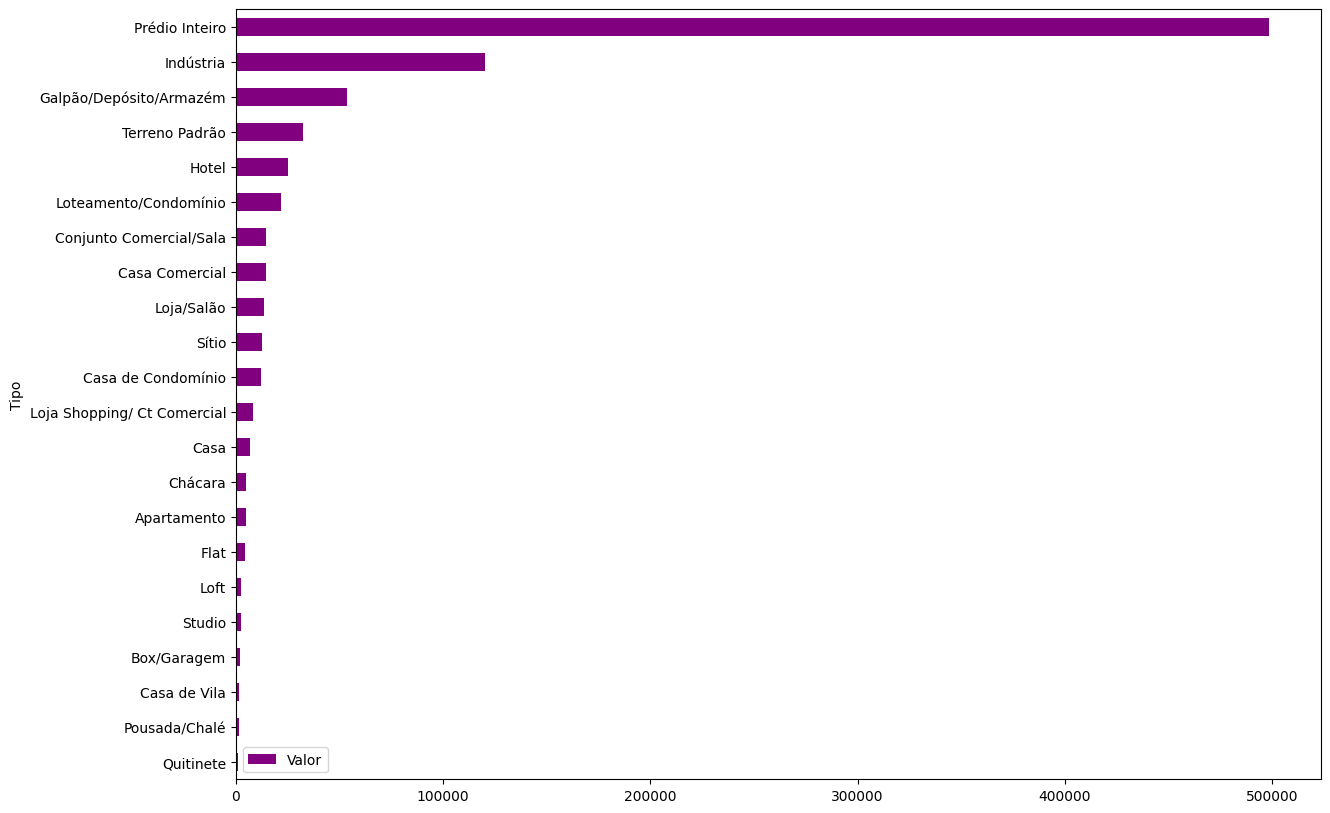

In [18]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_preco_tipo.plot(kind='barh', figsize =(14,10), color='purple')

## Removendo os imóveis comerciais

In [24]:
dados.Tipo.unique() #Esse método retorna um array NumPy contendo os valores distintos encontrados na coluna.


array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [29]:
imoveis_comerciais = [
    "Conjunto Comercial/Sala",
    "Prédio Inteiro",
    "Loja/Salão",
    "Galpão/Depósito/Armazém",
    "Casa Comercial",
    "Loja Shopping/Ct Comercial",
    "Hotel",
    "Indústria"
]

In [34]:
imoveis_residencial = dados.query('@imoveis_comerciais not in Tipo') #O método query é uma ferramenta do Pandas que permite selecionar dados em um DataFrame usando as condições que especificamos. Ele usa uma sintaxe semelhante ao SQL e é útil quando precisamos filtrar nossos dados.
imoveis_comercial = dados.query('@imoveis_comerciais in Tipo')
imoveis_residencial.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

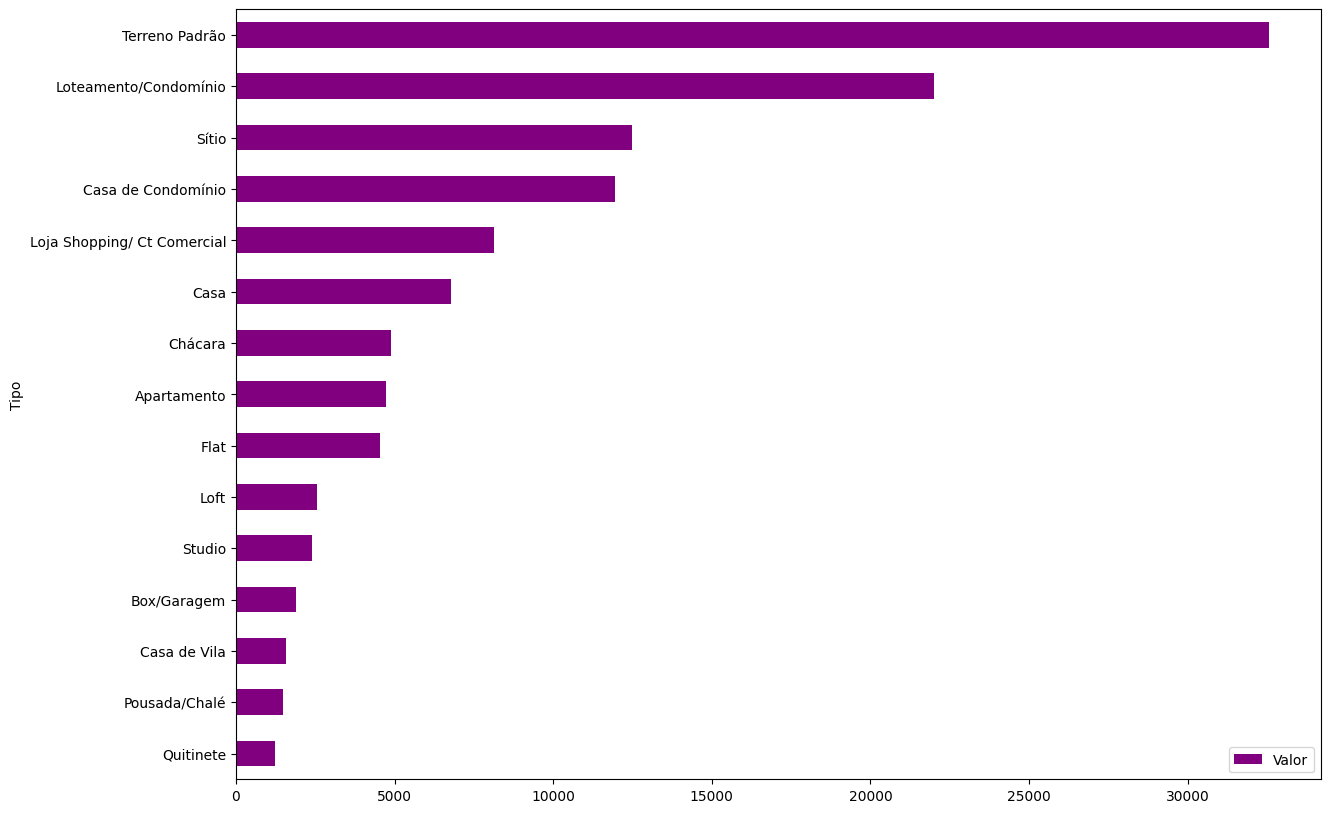

In [35]:
df_preco_tipo = imoveis_residencial.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_preco_tipo.plot(kind='barh', figsize =(14,10), color='purple')

,proportion
Tipo,
Apartamento,0.830195
Casa de Condomínio,0.042334
Casa,0.041102
Quitinete,0.035534
Flat,0.020232
Casa de Vila,0.010584
Loja Shopping/ Ct Comercial,0.010499
Box/Garagem,0.003485
Terreno Padrão,0.002975


## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [58]:
df_percentual_tipo = imoveis_residencial.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo') #O método value_counts() do Pandas é usado para retornar uma série contendo contagens de valores únicos em uma coluna ou em um objeto Series do Pandas.
 #O método .to_frame() no Pandas é utilizado para converter uma Series em um DataFrame
 #normalize=True faz com que os valores sejam apresentados como percentuais (proporções entre 0 e 1), em vez de contagens absolutas.

<Axes: xlabel='Tipos', ylabel='percentual'>

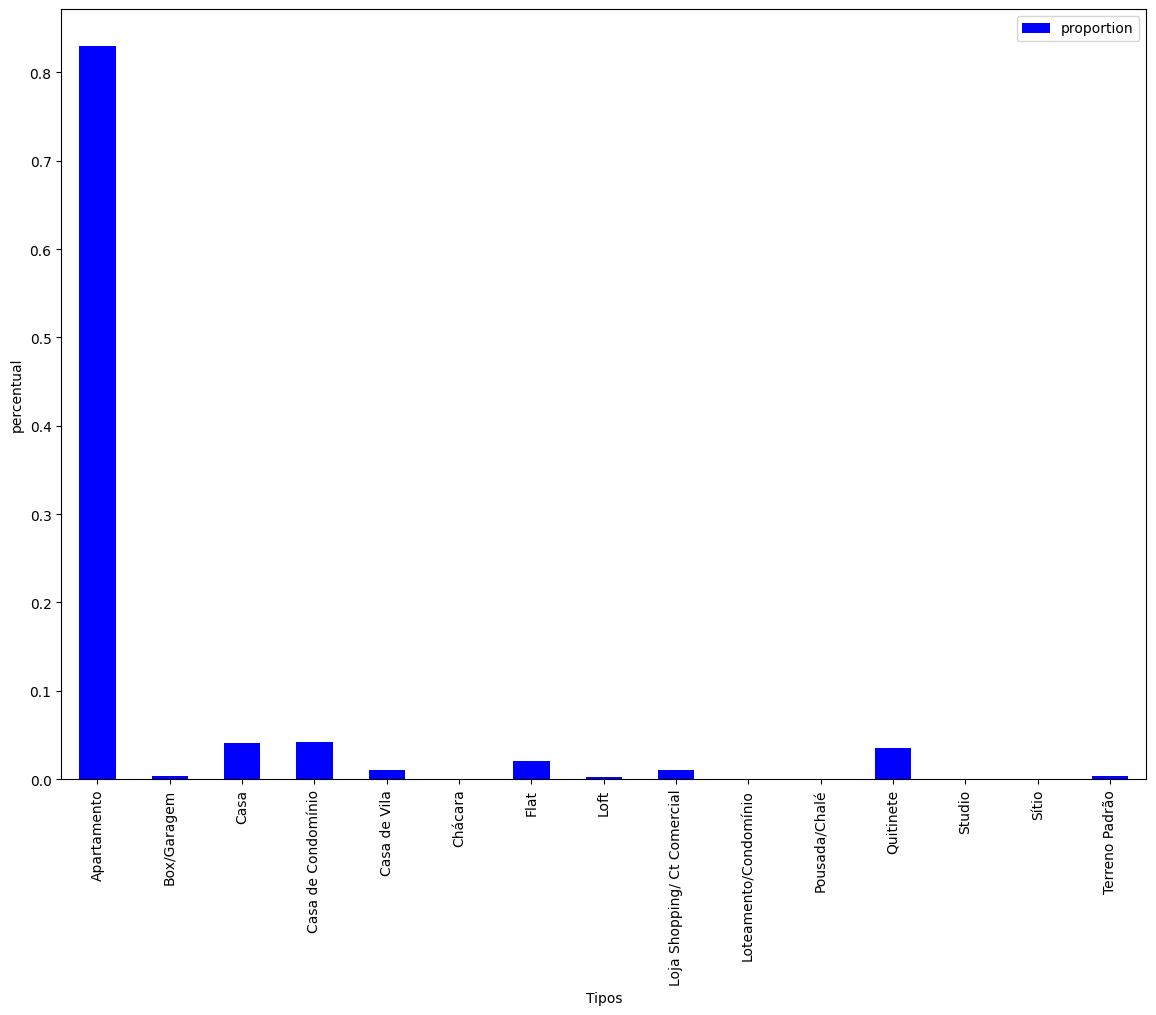

In [61]:

df_percentual_tipo .plot(kind='bar', figsize =(14,10), color='blue', xlabel = 'Tipos',ylabel = 'percentual')

### **Selecionando apenas os imóveis do tipo apartamento**

In [64]:
imoveis_residencial.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [72]:
df_apartamento = imoveis_residencial.query('Tipo == "Apartamento"')
df_apartamento['Quartos'].mean()

2.481568707761622

In [75]:
dados.head()
len(dados.Bairro.unique())

162

In [76]:
dados.groupby('Bairro')['Valor'].mean().sort_values('Valor', ascending =False)

,Valor
Bairro,
Senador Camará,635.000000
Santíssimo,709.090909
Magalhães Bastos,726.666667
Turiaçu,733.333333
Inhoaíba,738.888889
...,...
Cidade Nova,88166.692308
Vasco da Gama,120000.000000
Caju,120264.782609


In [ ]:
# Salvando o DataFrame em uma variável
df_exemplo = df['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

# Alterando o nome da coluna "Proportion" para "Percentuais"
df_exemplo.rename(columns={'proportion': 'Percentuais'}, inplace=True)

#Nós utilizamos o parâmetro inplace=True para que essa alteração seja definitivamente aplicada no nosso DataFrame df_exemplo. Sendo assim, ao visualizar o DataFrame, teremos o seguinte resultado:

# Visualizando o DataFrame
df_exemplo

# Tratando e filtrando os dados

## Lidando com dados nulos

## Removendo registros

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

## Salvando os dados

# Manipulando os dados

## Criando colunas numéricas

## Criando colunas categóricas